In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-pastel')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 最大间隔分类

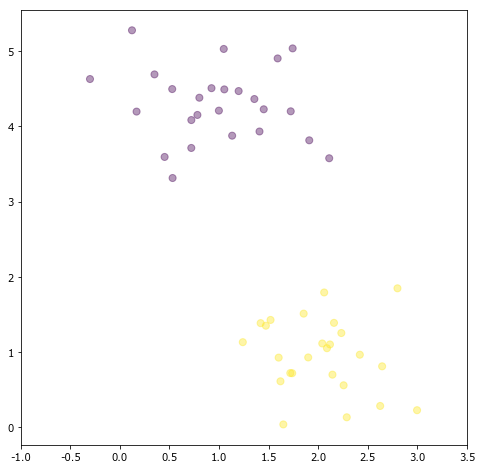

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.50)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.4)
plt.xlim(-1, 3.5);

(-1, 3.5)

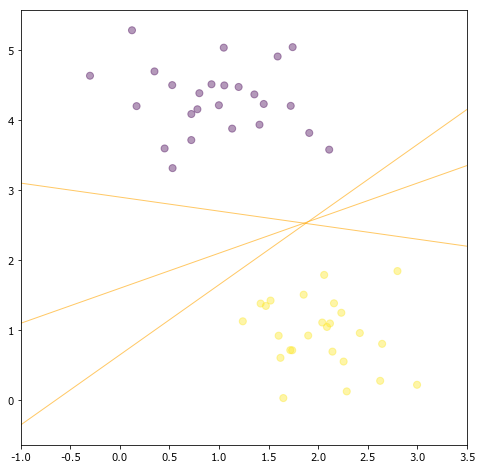

In [3]:
# 可能存在无数个间隔器

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.4)

xx = np.linspace(-1.0, 3.5)

for w,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = w * xx + b
    plt.plot(xx, yy, 'orange', linewidth=1.0, alpha=0.6)
    
plt.xlim(-1, 3.5)

(-1, 3.5)

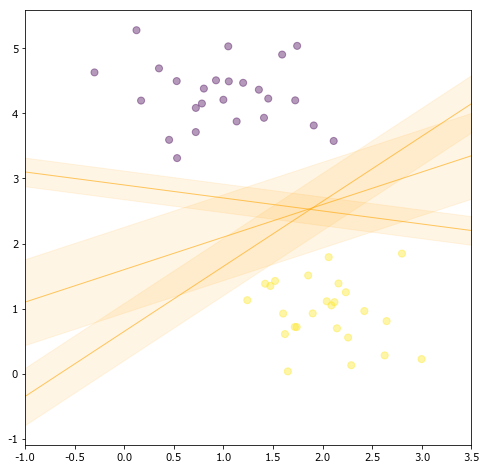

In [4]:
# 寻找最优的间隔器，应具备既能够实现分类，有具有泛化能力，其实也就是最大化点到间隔器的距离

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.4)

xx = np.linspace(-1.0, 3.5)

for w,b,d in [(1, 0.65, 0.44), (0.5, 1.6, 0.66), (-0.2, 2.9, 0.22)]:
    yy = w * xx + b
    plt.plot(xx, yy, 'orange', linewidth=1.0, alpha=0.6)
    plt.fill_between(xx, yy-d, yy+d, color='orange', alpha=0.1)
    
plt.xlim(-1, 3.5)

#### 拟合支持向量机

In [5]:
clf = SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(-1.0, 3.5)

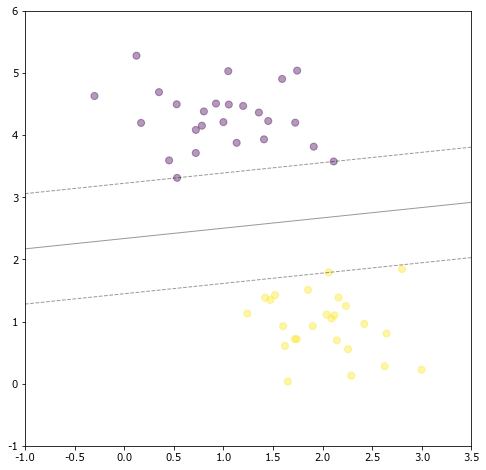

In [6]:
# 画出决策边界

x1 = np.linspace(-1.0, 3.5)
x2 = np.linspace(-1.0, 6.0)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.4)
plt.contour(xx1, xx2, yy, colors='black', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.xlim(-1.0, 3.5)

说明：在绘制等高线时比较抽象，一般是高维映射到二维空间，就拿三维举例，我们的数据x1, x2在平面坐标系各50个，而拿到三维空间，就各需要2500个，为什么这么说呢，在二维空间中x1, x2的每对是一个平面坐标，而要表示三维，根据决策函数，输入都是2500个，输出固然也是2500个，xx1, xx2, yy每50个数据则表示三维空间中的一条与yy平行的直线，这2500个坐标系组合就成了一个空间...

上图中在虚线上的点称为支持向量点，可以通过support_vector_取到..

In [7]:
clf.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [2.06051753, 1.79059891]])

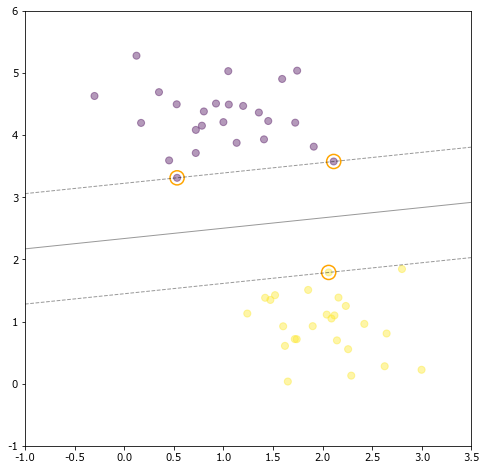

In [8]:
# 标识出支持向量点

x1 = np.linspace(-1.0, 3.5)
x2 = np.linspace(-1.0, 6.0)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.4)
plt.contour(xx1, xx2, yy, colors='black', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)

#### 幅度敏感

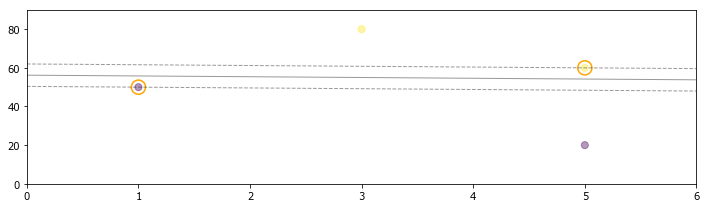

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]])
ys = np.array([0, 0, 1, 1])

clfs1 = SVC(kernel='linear')
clfs1.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.axis([0, 6, 0, 90])
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, s=50, alpha=0.4)
x1 = np.linspace(0, 6)
x2 = np.linspace(0, 100)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clfs1.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.contour(xx1, xx2, yy, levels=[-1, 0 ,1], colors='black', linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clfs1.support_vectors_[:,0], clfs1.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)

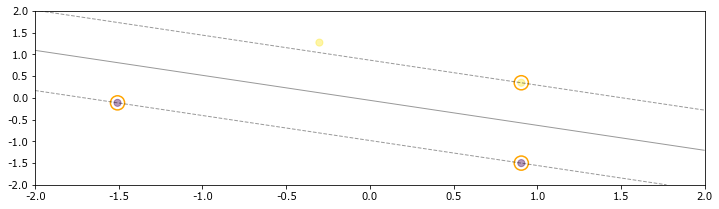

In [10]:
# 幅度缩放后

from sklearn.preprocessing import StandardScaler

clfstd = StandardScaler()
Xs = clfstd.fit_transform(Xs)

clfs2 = SVC(kernel='linear')
clfs2.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.axis([-2, 2, -2, 2])
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, s=50, alpha=0.4)
x1 = np.linspace(-2.0, 2.0)
x2 = np.linspace(-2.0, 2.0)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clfs2.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.contour(xx1, xx2, yy, levels=[-1, 0 ,1], colors='black', linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clfs2.support_vectors_[:,0], clfs2.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)

#### 异常点敏感

对于SVM中如果输入特征数据存在幅度过大的特征列，也会对决策边界造成影响，间隔肯定会变小，无论从目标优化函数，还是从图像中都能够肯出，如果一列特征过大，模型为了能够拟合数据，肯定纳入的支持向量会少很多，而且模型存在欠拟合风险，如果特征列幅度都一直，相对来说，数据也就比较集中，支持向量会多很多，也模型拟合效果也会好很多！！

同时SVM对异常点也敏感，异常点故而言之是误分类点，为了使得误分类损失变小，故而间隔会被拉大，也就是模型更多的关注误分类点...

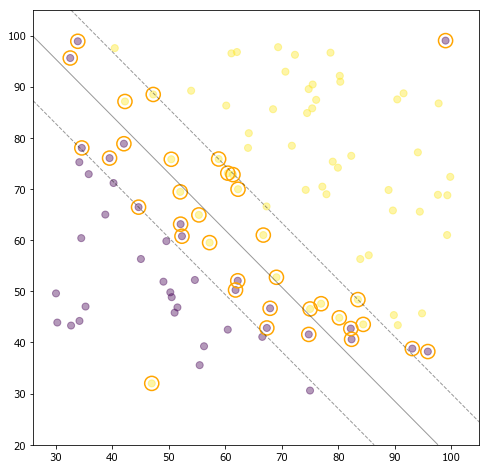

In [11]:
data = np.loadtxt("./data1.txt", delimiter=',')

X_1 = data[:, :-1]
y_1 =data[:, -1]

X_outliers = np.array([[47, 32], [99, 99]])
y_outliers = np.array([1, 0])

clfoutliers = SVC(kernel='linear', C=0.1)
clfoutliers.fit(np.r_[X_1, X_outliers], np.r_[y_1, y_outliers])

x1 = np.linspace(26, 105)
x2 = np.linspace(20, 105)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clfoutliers.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.figure(figsize=(8, 8))
plt.scatter(np.r_[X_1, X_outliers][:,0], np.r_[X_1, X_outliers][:,1], c=np.r_[y_1, y_outliers], s=50, alpha=0.4)
plt.contour(xx1, xx2, yy, colors='black', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clfoutliers.support_vectors_[:,0], clfoutliers.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)

上图清楚的看到，对于存在异常点的数据，SVM决策出现了失误！为了使得误差不那么大，间隔相对较大，且整体往负样本想象偏移，所以在构建模型之前，先要看下是否存在异常点，可以用箱型图，画个散点看看，对异常数据进行筛选... 而对于异常数据的处理，一般要么删除掉，要么进行修正...，比如以下进行修正，我们再看看分类情况：

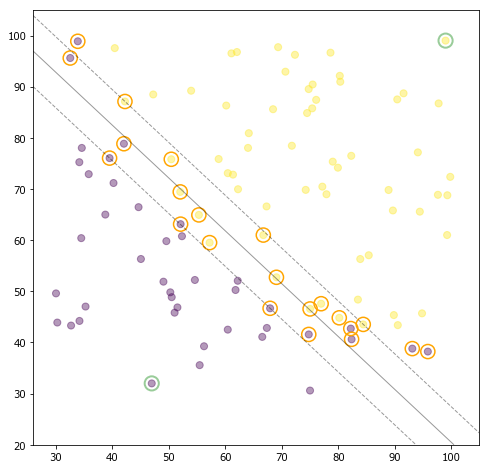

In [12]:
X_outliers = np.array([[47, 32], [99, 99]])
y_outliers = np.array([0, 1])

clfoutliers = SVC(kernel='linear')
clfoutliers.fit(np.r_[X_1, X_outliers], np.r_[y_1, y_outliers])

x1 = np.linspace(26, 105)
x2 = np.linspace(20, 105)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clfoutliers.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.figure(figsize=(8, 8))
plt.scatter(np.r_[X_1, X_outliers][:,0], np.r_[X_1, X_outliers][:,1], c=np.r_[y_1, y_outliers], s=50, alpha=0.4)
plt.contour(xx1, xx2, yy, colors='black', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clfoutliers.support_vectors_[:,0], clfoutliers.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)
plt.scatter([47, 99], [32, 99], alpha=0.4, edgecolors='g', facecolor='none', s=200, linewidths=2)

In [17]:
clfoutliers

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

对于SVM中的参数，一般有C，kernel，decision_function_shape和tol可选择，较常用的是C参数影响间隔，和Kernel对于非线性分割的支持，decision_function_shape可用于多分类场景...

In [18]:
from sklearn.svm import SVR

svr = SVR()
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

对于SVR可调参数有C，degree，epsilon，gamma，kernel，tol，其中coef0，degree，gamma是在选择核函数中参数的调参... 而epsilon则是对于损失函数为0损失的间隔定义...

In [13]:
# 我们来交互玩一下

from ipywidgets import interact

def plot_svm(N):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0)
    X = X[:N]
    y = y[:N]
    x1 = np.linspace(-1.0, 3.5)
    x2 = np.linspace(-1.0, 6.0)
    xx1, xx2 = np.meshgrid(x1, x2)
    clf = SVC(C=100, kernel='linear')
    clf.fit(X, y)
    yy = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
    yy = yy.reshape(xx1.shape)
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.4)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)
    plt.contour(xx1, xx2, yy, levels=[-1, 0 ,1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
    plt.xlim(-1.0, 3.5)
    return clf.support_vectors_
    
interact(plot_svm, N=[10, 20, 50, 100, 200], kernel='linear')

interactive(children=(Dropdown(description='N', options=(10, 20, 50, 100, 200), value=10), Output()), _dom_cla…

<function __main__.plot_svm(N)>

说明：这边通过调整参数，来偏向不同的关注，C越小，也就越关注最大化间隔，也就是说这个时候间隔越大，而C越大，则越关注噪声点和误分类点，间隔会变小。这里除了支持向量点，误分类点和间隔内的点都是参与参数计算的！！

* 如果$\alpha = 0$，那么$\xi_i = 0$，$y_i(w^Tx_i + b) - 1 > 0$，即样本已经被正确分类。
* 如果$0 < \alpha < C$，那么$\xi_i = 0$，$y_i(w^Tx_i + b) - 1 = 0$，即该点为支持向量。
* 如果$\alpha = C$，说明要么是噪声点，要么是误分类点，需要检查此时$\xi_i$

    * 如果$0 < \xi_i < 1$，该点被正确分类，但是却在超平面和自己类别的支持向量之间。
    * 如果$\xi_i = 1$，该点在分离超平面上，无法被正确分类。
    * 如果$\xi_i > 1$，该店就是误分类的点。

#### 核函数

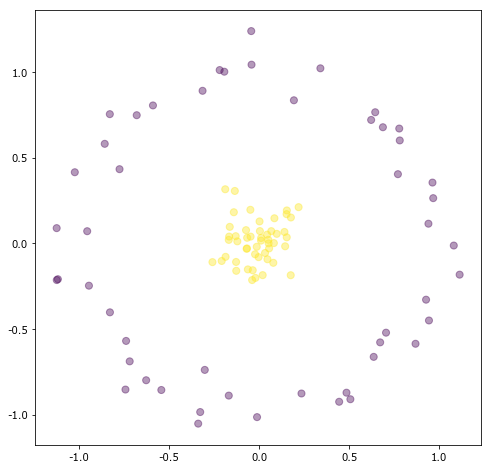

In [14]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X, y)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.4)

In [15]:
# 特征映射

clf = SVC(kernel='rbf')
clf.fit(X, y)
r = np.exp(-(X[:, 0] ** 2 - X[:, 1] ** 2))
r1 = np.exp(-(clf.support_vectors_[:,0] ** 2 - clf.support_vectors_[:,1] ** 2))

def plot_3d(elev=30, azim=30):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, alpha=0.4)
    ax.scatter3D(clf.support_vectors_[:,0], clf.support_vectors_[:,1], r1, edgecolors='orange', facecolor='none', s=200, linewidths=1.5)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
interact(plot_3d, elev=[0, 10, 20, 30, 60, 90], azip=(-90, 90))

interactive(children=(Dropdown(description='elev', index=3, options=(0, 10, 20, 30, 60, 90), value=30), IntSli…

<function __main__.plot_3d(elev=30, azim=30)>

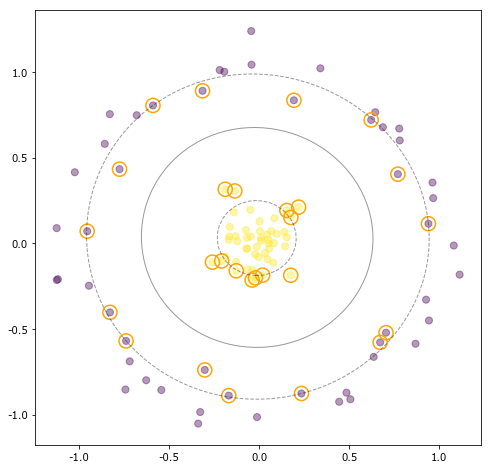

In [16]:
# 非线性可分的决策边界

clf = SVC(kernel='rbf')
clf.fit(X, y)

x1 = np.linspace(-1.0, 1.0)
x2 = np.linspace(-1.0, 1.0)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.4)
plt.contour(xx1, xx2, yy, colors='black', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)

说明：内部虚线圆圈是决策边界正确分类的样本，而两虚线圆圈内是间隔内的样本点，外部虚线圆圈是分类出另一部分的样本点的决策边界！